In [146]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.7.1'

In [147]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [148]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [149]:
def plot_preds(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               preds=None):
    plt.figure(figsize=(8, 5))
    plt.scatter(train_data, train_labels, c='blue', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='green', s=4, label="Testing data")
    if(preds is not None):
        plt.scatter(test_data, preds, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})


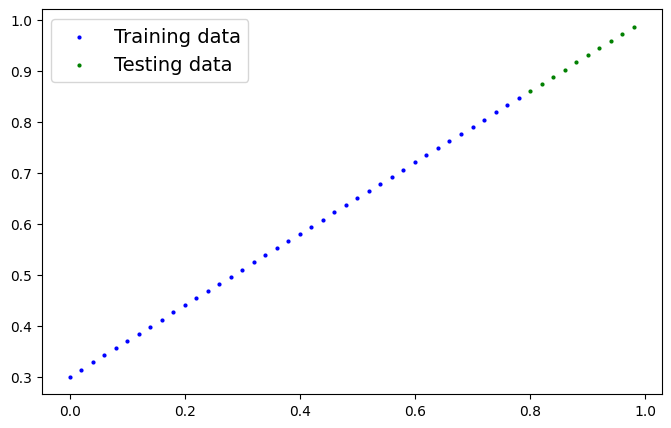

In [150]:
plot_preds()

In [151]:
class LinearRegressionModel(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float32), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [152]:
torch.manual_seed(seed=7)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([-0.1468], requires_grad=True),
 Parameter containing:
 tensor([0.7861], requires_grad=True)]

In [153]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.1468])), ('bias', tensor([0.7861]))])

In [154]:
with torch.inference_mode():
    y_preds = model_0(X_test)

print(len(X_test), len(y_preds))
print(y_preds)

10 10
tensor([[0.6687],
        [0.6658],
        [0.6628],
        [0.6599],
        [0.6570],
        [0.6540],
        [0.6511],
        [0.6482],
        [0.6452],
        [0.6423]])


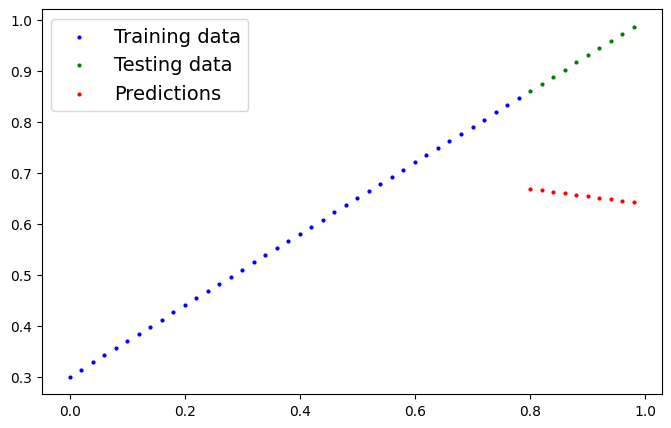

In [155]:
plot_preds(preds=y_preds)

In [156]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.05)

In [157]:
torch.manual_seed(7)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    model_0.train()
    y_pred = model_0.forward(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)

        if(epoch%10 == 0):
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train loss: {loss} | MAE Test loss: {test_loss}")

Epoch: 0 | MAE Train loss: 0.20521485805511475 | MAE Test loss: 0.2907183766365051
Epoch: 10 | MAE Train loss: 0.163753479719162 | MAE Test loss: 0.36201924085617065
Epoch: 20 | MAE Train loss: 0.146031454205513 | MAE Test loss: 0.33782967925071716
Epoch: 30 | MAE Train loss: 0.1288381963968277 | MAE Test loss: 0.296467661857605
Epoch: 40 | MAE Train loss: 0.11166403442621231 | MAE Test loss: 0.2585400938987732
Epoch: 50 | MAE Train loss: 0.09451418370008469 | MAE Test loss: 0.21717801690101624
Epoch: 60 | MAE Train loss: 0.0773201733827591 | MAE Test loss: 0.17581593990325928
Epoch: 70 | MAE Train loss: 0.06015435978770256 | MAE Test loss: 0.1378883570432663
Epoch: 80 | MAE Train loss: 0.04299616068601608 | MAE Test loss: 0.09652625769376755
Epoch: 90 | MAE Train loss: 0.025802144780755043 | MAE Test loss: 0.055164188146591187


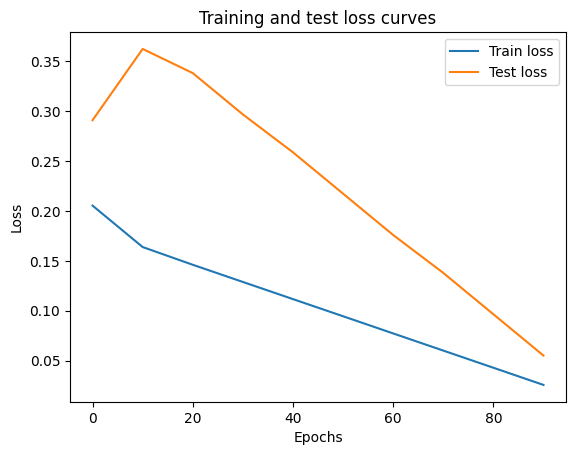

In [158]:
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [159]:
print(model_0.state_dict())

OrderedDict({'weights': tensor([0.6574]), 'bias': tensor([0.3186])})


In [160]:
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.8445],
        [0.8577],
        [0.8708],
        [0.8840],
        [0.8971],
        [0.9103],
        [0.9234],
        [0.9366],
        [0.9497],
        [0.9628]])

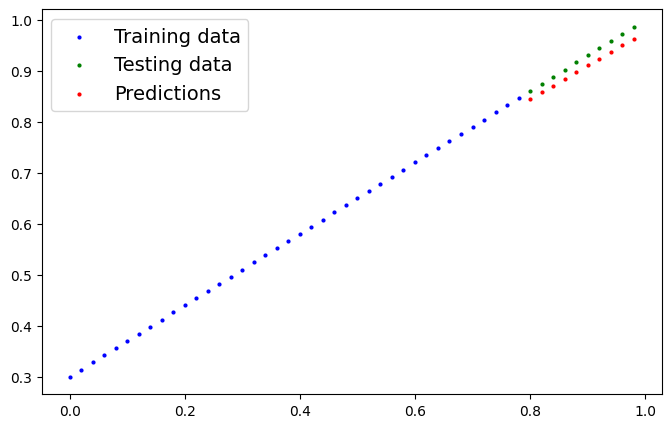

In [161]:
plot_preds(preds=y_preds)

In [162]:
from pathlib import Path

In [164]:
MODEL_PATH = Path("models")
MODEL_NAME = "pytorch_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_model_0.pth


In [166]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [167]:
loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test)

In [168]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])